In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font',family='Malgun Gothic')
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as stats

In [2]:
### RecurrenceOfSurgery List 1

In [3]:
df_ROS = pd.read_csv('../../datasets/RecurrenceOfSurgery.csv')
df_ROS[:2]

,Unnamed: 0,환자ID,Large Lymphocyte,Location of herniation,ODI,가족력,간질성폐질환,고혈압여부,과거수술횟수,당뇨여부,...,Modic change,PI,PT,Seg Angle(raw),Vaccum disc,골밀도,디스크단면적,디스크위치,척추이동척도,척추전방위증
0,0,1PT,22.8,3,51.0,0.0,0,0,0,0,...,3,51.6,36.6,14.4,0,-1.01,2048.5,4,Down,0
1,1,2PT,44.9,4,26.0,0.0,0,0,0,0,...,0,40.8,7.2,17.8,0,-1.14,1753.1,4,Up,0


In [4]:
df_ROS_forpatient = df_ROS[['환자ID', '성별', '신장', '체중']]
df_ROS_forpatient.head(4)

,환자ID,성별,신장,체중
0,1PT,2,163,60.3
1,2PT,1,171,71.7
2,3PT,1,178,77.1
3,4PT,1,174,74.2


In [5]:
df_ROS_forpatient.describe(datetime_is_numeric=True)

,성별,신장,체중
count,1894.000000,1894.000000,1894.000000
mean,1.383316,168.027983,68.111140
std,0.486323,9.211419,11.234318
min,1.000000,140.000000,35.000000
25%,1.000000,161.000000,59.700000
50%,1.000000,169.000000,68.000000
75%,2.000000,175.000000,75.000000
max,2.000000,204.000000,136.100000


In [6]:
### int 형은 string and then datetime 순서로 변환 

In [7]:
df_ROS_forpatient['신장'].astype(int)

0       163
1       171
2       178
3       174
4       183
       ... 
1889    157
1890    157
1891    167
1892    177
1893    168
Name: 신장, Length: 1894, dtype: int32

In [8]:
df_ROS_forpatient['체중']

0       60.3
1       71.7
2       77.1
3       74.2
4       80.7
        ... 
1889    64.0
1890    59.0
1891    70.0
1892    77.0
1893    49.0
Name: 체중, Length: 1894, dtype: float64

In [9]:
df_ROS_forpatient[['신장', '체중']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1894 entries, 0 to 1893
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   신장      1894 non-null   int64  
 1   체중      1894 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 29.7 KB


In [10]:
#'2019-01-11 오전 5:32' → 데이터를 슬라이싱/[:10] '2019-01-11'
# str('2019-01-11 오전 5:32')[:10]
def cm_to_meter(height_cm):
    return height_cm / 100

In [11]:
def classify_bmi(bmi):
    if bmi < 18.5:
        return '저체중'
    elif bmi < 24.9:
        return '정상'
    elif bmi < 29.9:
        return '과체중'
    else:
        return '비만'

In [12]:
df_ROS_forpatient_copy = df_ROS_forpatient.copy()

In [13]:
df_ROS_forpatient_copy['신장_height_int'] = df_ROS_forpatient_copy['신장'].apply(cm_to_meter)
df_ROS_forpatient_copy['체중_weight_int'] = df_ROS_forpatient_copy['체중'] 

In [14]:
# BMI 계산: 체중(kg) / (신장(m)의 제곱)
df_ROS_forpatient_copy['BMI'] = df_ROS_forpatient_copy['체중_weight_int'] / (df_ROS_forpatient_copy['신장_height_int'] ** 2)

In [20]:
# 체중 상태 분류 추가
df_ROS_forpatient_copy['체중_상태'] = df_ROS_forpatient_copy['BMI'].apply(classify_bmi)

In [19]:
print(df_ROS_forpatient_copy[['신장_height_int', '체중_weight_int', 'BMI', '체중_상태']])

      신장_height_int  체중_weight_int        BMI 체중_상태
0              1.63           60.3  22.695623    정상
1              1.71           71.7  24.520365    정상
2              1.78           77.1  24.334049    정상
3              1.74           74.2  24.507861    정상
4              1.83           80.7  24.097465    정상
...             ...            ...        ...   ...
1889           1.57           64.0  25.964542   과체중
1890           1.57           59.0  23.936062    정상
1891           1.67           70.0  25.099502   과체중
1892           1.77           77.0  24.577867    정상
1893           1.68           49.0  17.361111   저체중

[1894 rows x 4 columns]


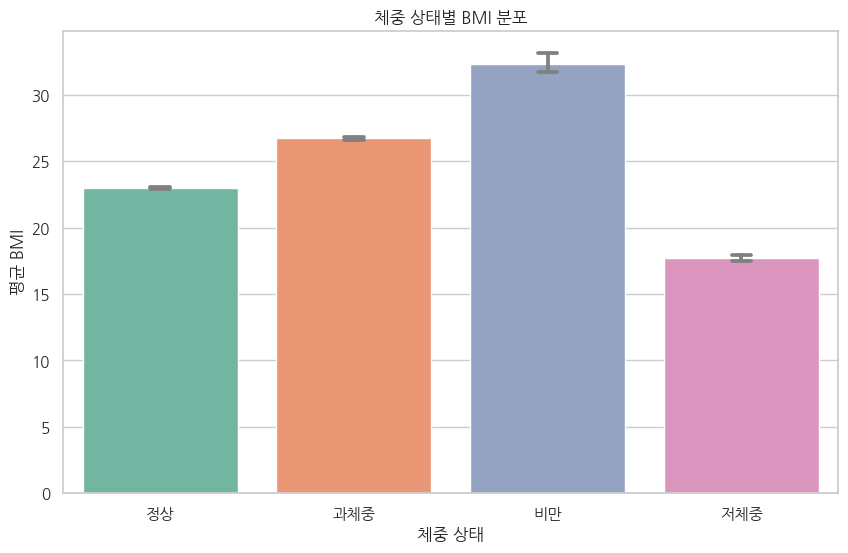

In [18]:
# 시각화
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
plt.rc('font', family='NanumGothic')  
sns.barplot(data=df_ROS_forpatient_copy, x='체중_상태', y='BMI', errcolor='gray', capsize=0.1, palette='Set2')
plt.title('체중 상태별 BMI 분포')
plt.xlabel('체중 상태')
plt.ylabel('평균 BMI')
plt.show()

### 결과 
- 체중상태별 BMI분포 결과  비만 > 과제충 > 정상> 저체중 순으로 분포되어 있는 것을 확인 할 수 있음 